# 1. Data Exploration and statistical analysis

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df_credit_record = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_Project/credit_record.csv')
df_application_record = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_Project/application_record.csv')

In [30]:
df_credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [31]:
df_application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [32]:
df_credit_record.tail()

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


In [33]:
df_application_record.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


In [34]:
df_credit_record.shape

(1048575, 3)

In [35]:
df_application_record.shape

(438557, 18)

In [36]:
df_credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [37]:
df_application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [38]:
df_credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [39]:
df_application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


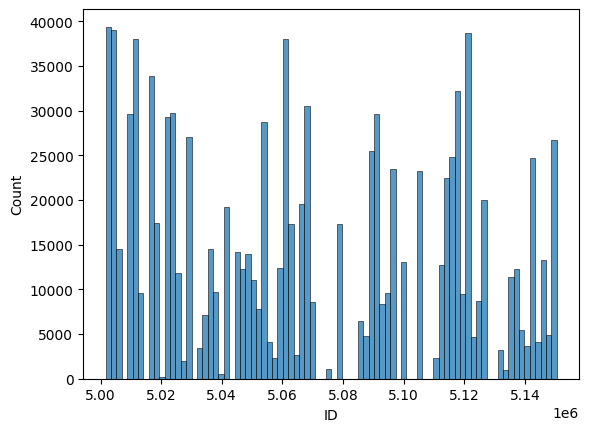

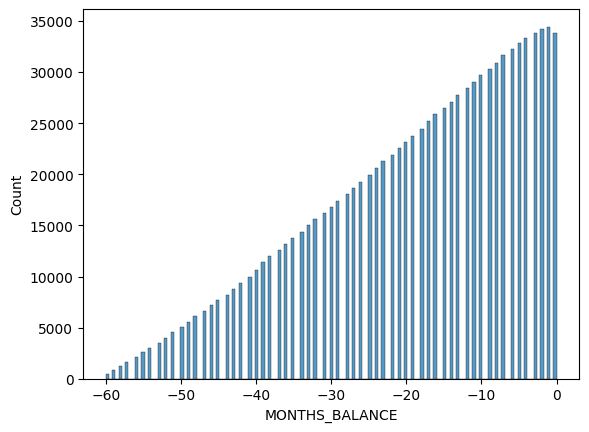

In [40]:
for i in df_credit_record.select_dtypes(include= "number").columns:
  sns.histplot(data=df_credit_record,x=i)
  plt.show()

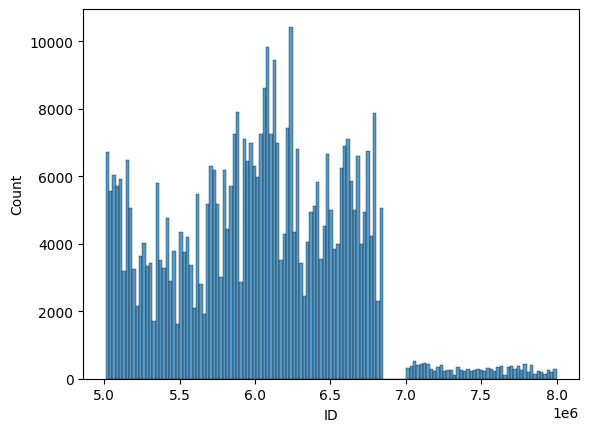

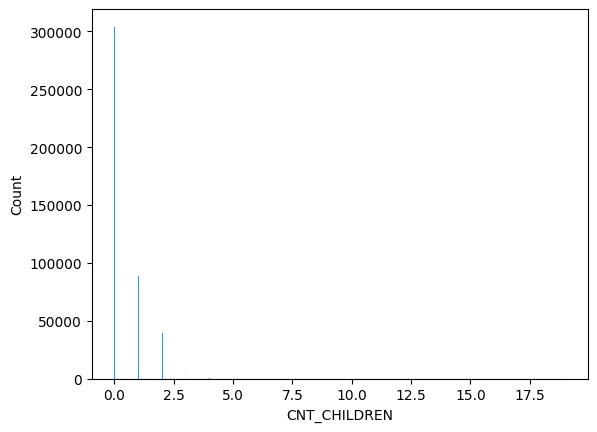

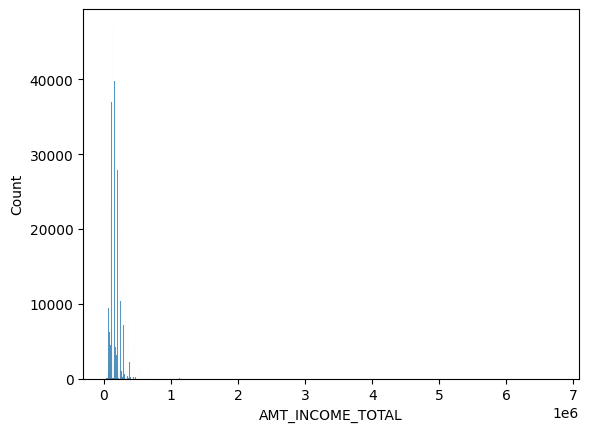

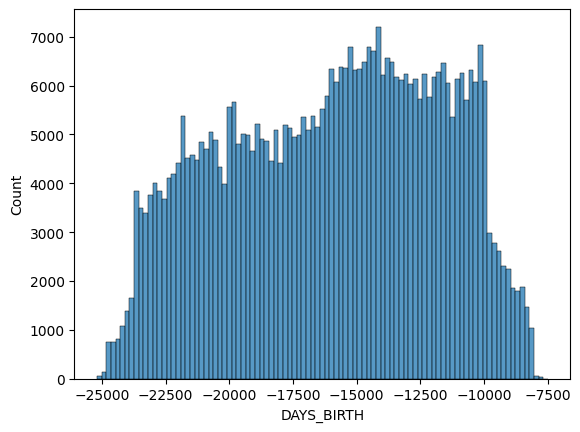

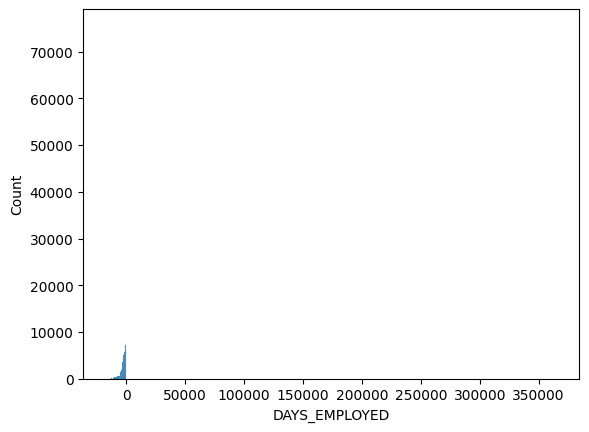

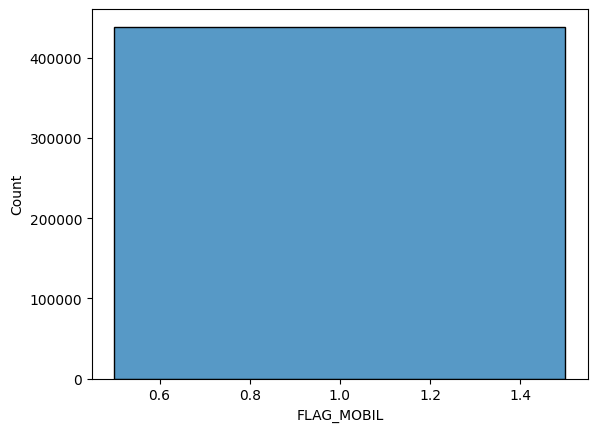

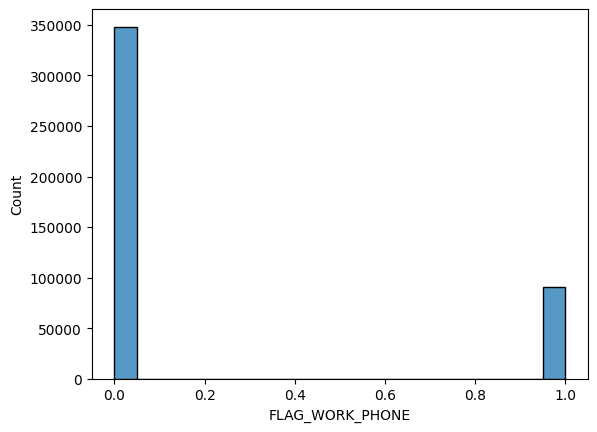

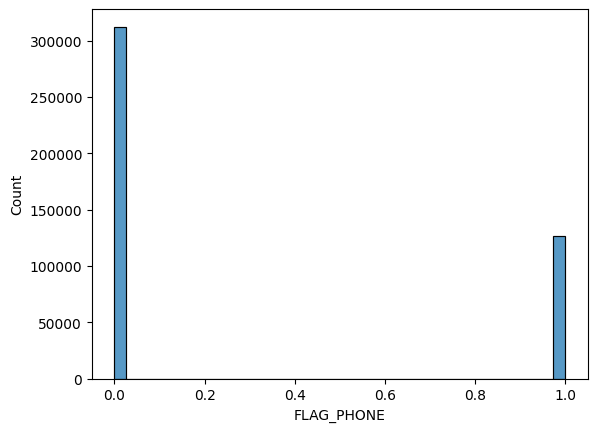

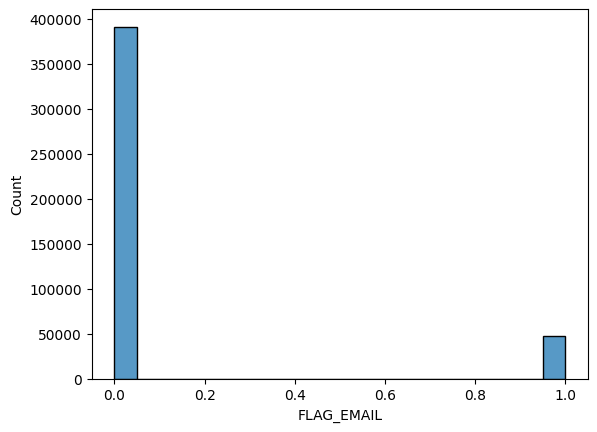

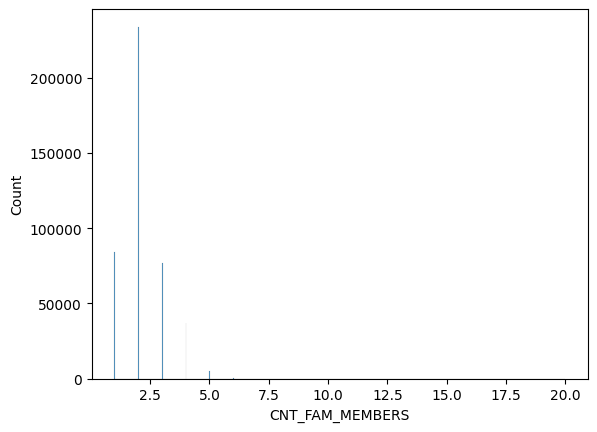

In [41]:
for i in df_application_record.select_dtypes(include= "number").columns:
  sns.histplot(data=df_application_record,x=i)
  plt.show()

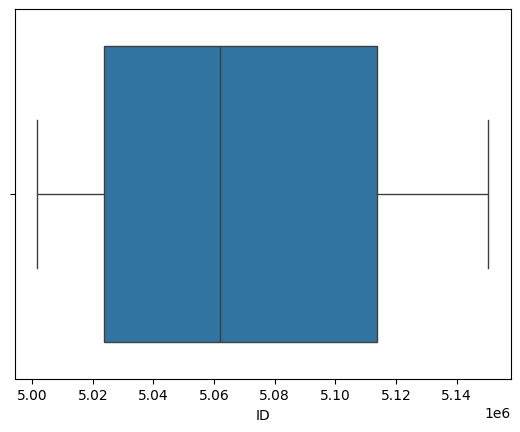

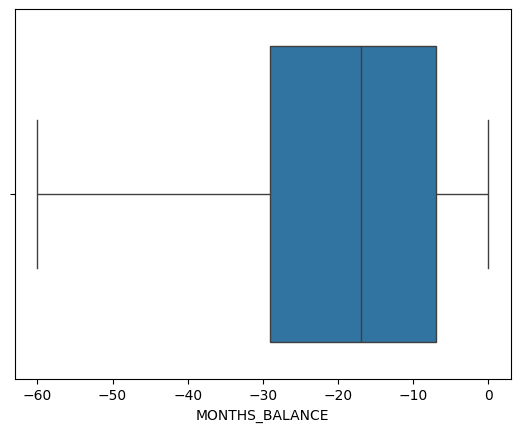

In [42]:
for i in df_credit_record.select_dtypes(include= "number").columns:
  sns.boxplot(data=df_credit_record,x=i)
  plt.show()

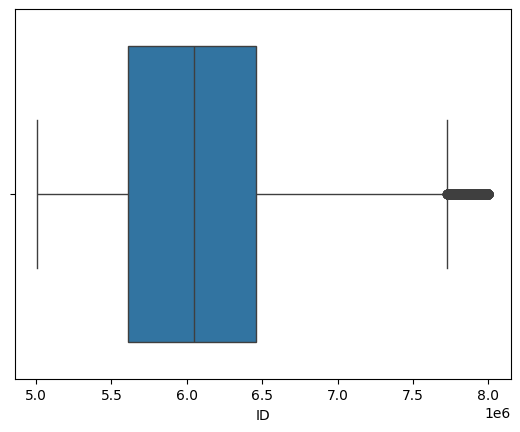

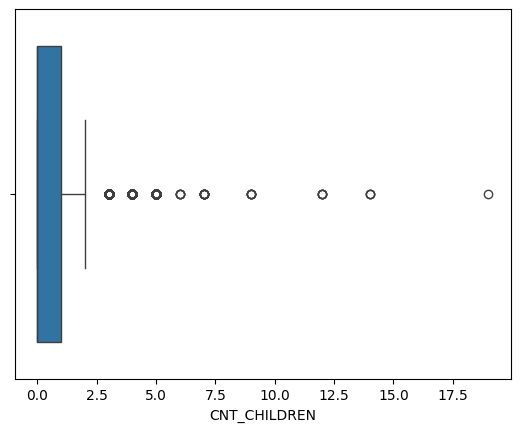

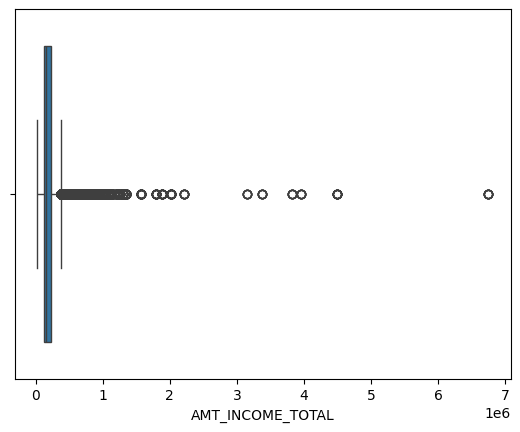

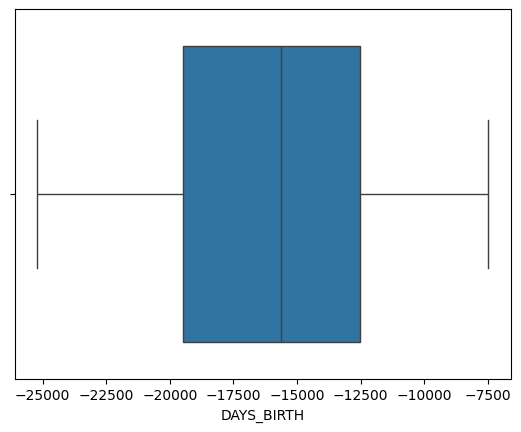

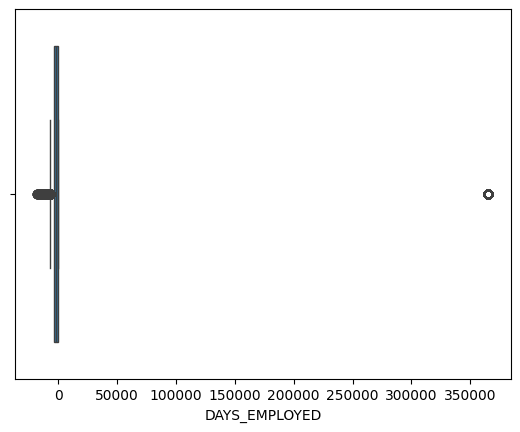

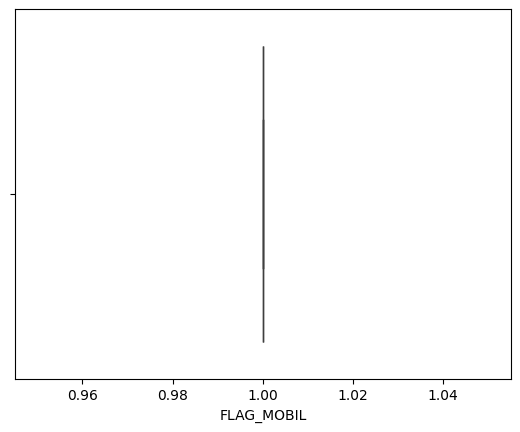

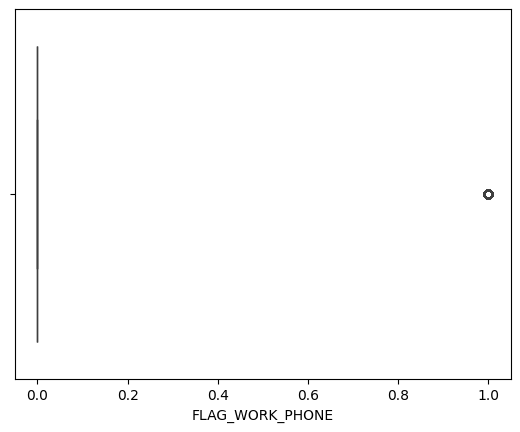

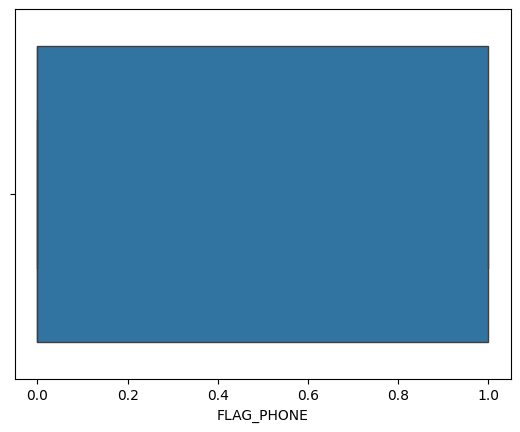

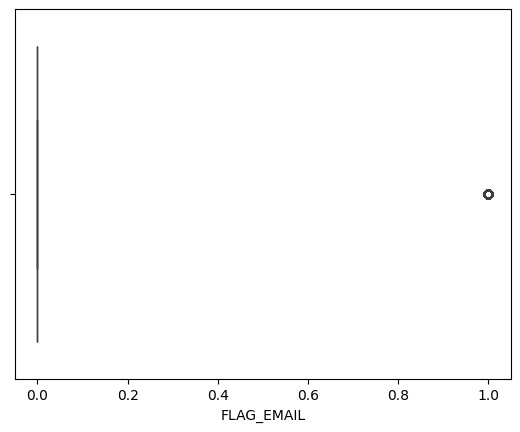

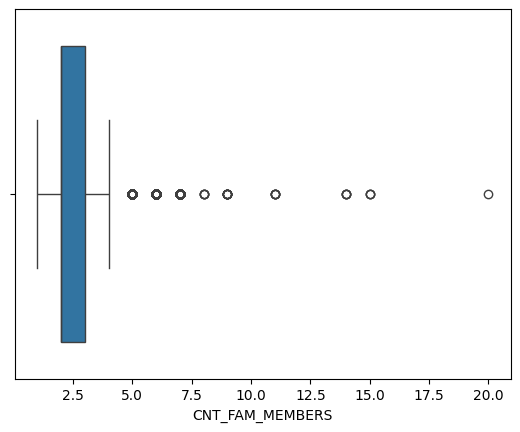

In [43]:
for i in df_application_record.select_dtypes(include= "number").columns:
  sns.boxplot(data=df_application_record,x=i)
  plt.show()

In [44]:
def wisker(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lw= q1- 1.5*iqr
  uw = q3 + 1.5*iqr
  return lw,uw

In [45]:
columns_to_treat = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

for col in columns_to_treat:
    lw, uw = wisker(df_application_record[col])
    df_application_record[col] = np.where(df_application_record[col] < lw, lw, df_application_record[col])
    df_application_record[col] = np.where(df_application_record[col] > uw, uw, df_application_record[col])

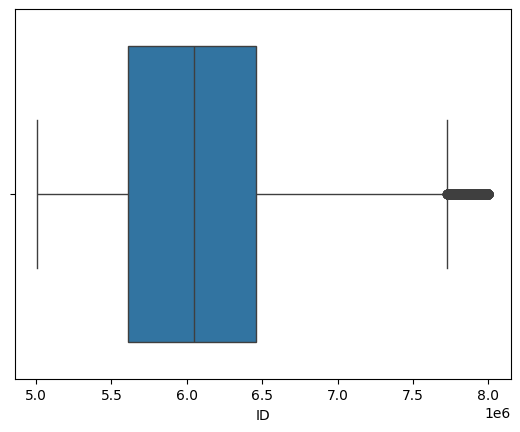

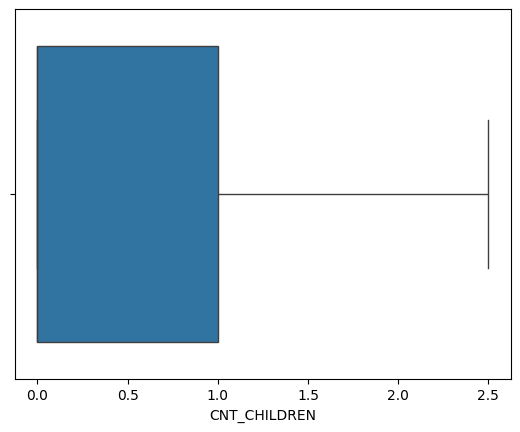

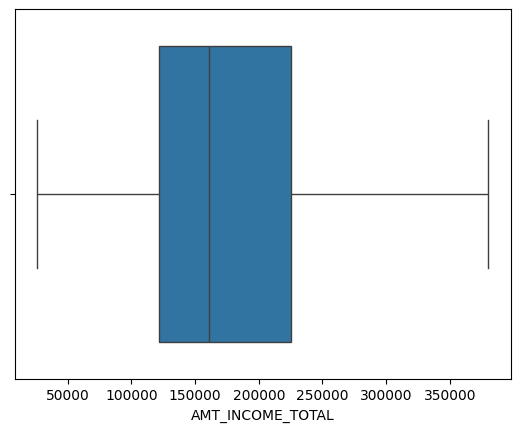

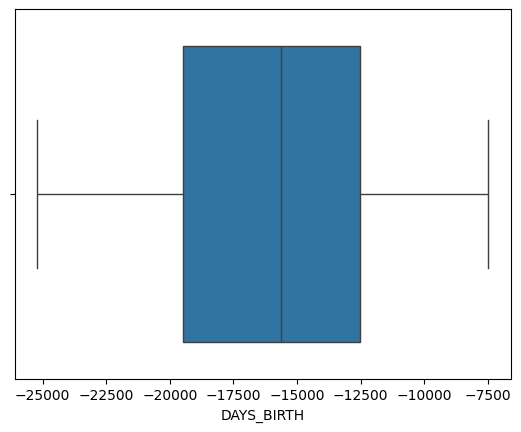

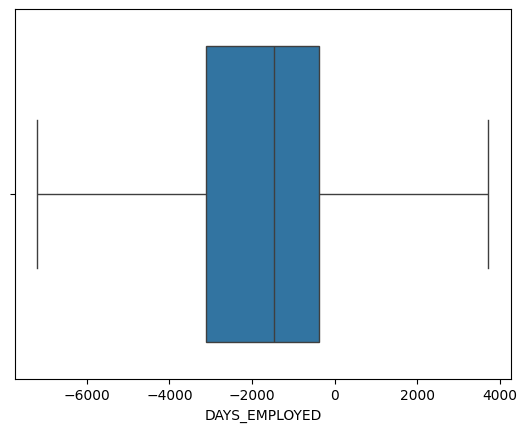

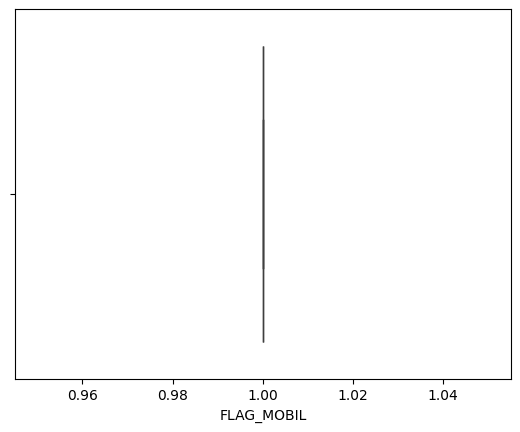

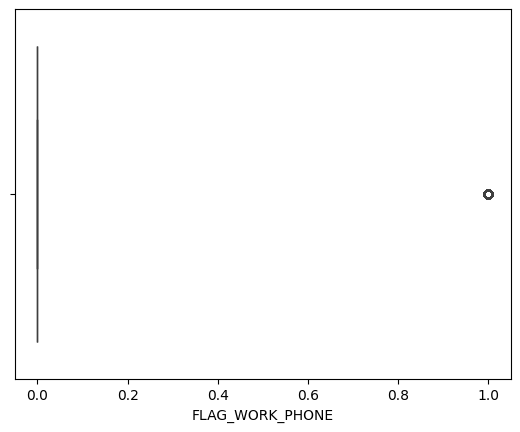

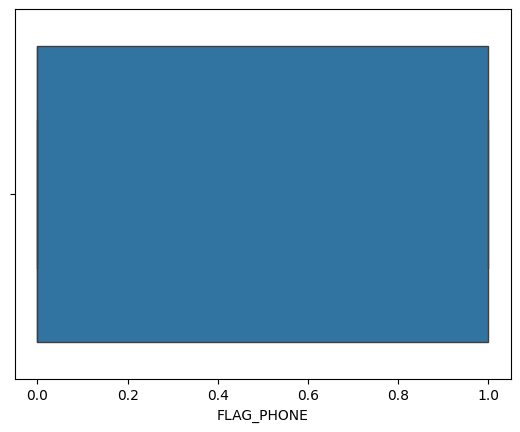

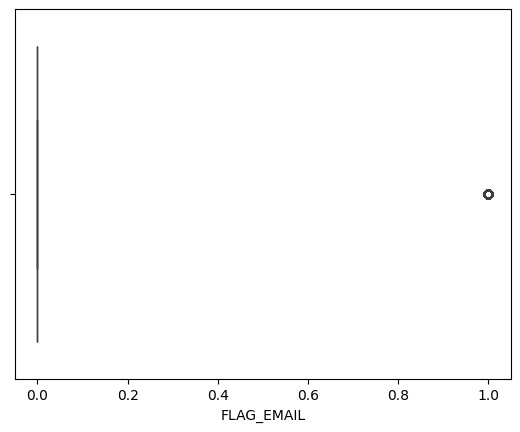

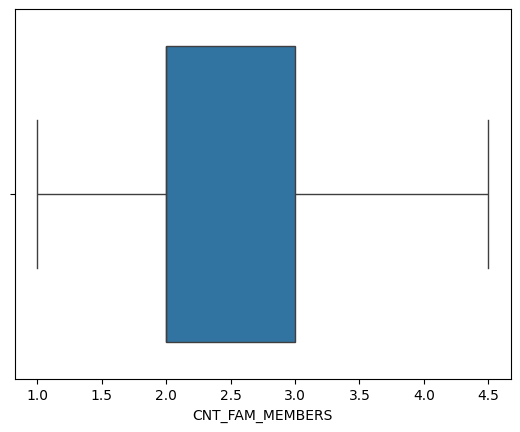

In [46]:
for i in df_application_record.select_dtypes(include= "number").columns:
  sns.boxplot(data=df_application_record,x=i)
  plt.show()

# 2. Preprocessing

In [47]:
df_credit_record.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


In [48]:
df_application_record.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [49]:
(df_application_record.isnull().sum()/df_application_record.shape[0])*100

,0
ID,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
NAME_INCOME_TYPE,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_HOUSING_TYPE,0.000000


In [50]:
df_application_record.drop(columns=['OCCUPATION_TYPE'], inplace=True)

In [51]:
df_application_record.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [52]:
df_credit_record_duplicates_based_on_id = df_credit_record.duplicated(subset=['ID'])
print(f"Number of duplicate rows based on ID: {df_credit_record_duplicates_based_on_id.sum()}")

df_application_record_duplicates_based_on_id = df_application_record.duplicated(subset=['ID'])
print(f"Number of duplicate rows based on ID: {df_application_record_duplicates_based_on_id.sum()}")

df_credit_record.drop_duplicates(subset=['ID'], inplace=True)
df_application_record.drop_duplicates(subset=['ID'], inplace=True)

Number of duplicate rows based on ID: 1002590
Number of duplicate rows based on ID: 47


In [53]:
for i in df_credit_record.select_dtypes(include = "object").columns:
  print(df_credit_record[i].value_counts())
  print("****"*10)

STATUS
C    22707
X    12266
0    10547
1      353
5       82
2       19
3        6
4        5
Name: count, dtype: int64
****************************************


In [54]:
for i in df_application_record.select_dtypes(include = "object").columns:
  print(df_application_record[i].value_counts())
  print("****"*10)

CODE_GENDER
F    294406
M    144104
Name: count, dtype: int64
****************************************
FLAG_OWN_CAR
N    275427
Y    163083
Name: count, dtype: int64
****************************************
FLAG_OWN_REALTY
Y    304040
N    134470
Name: count, dtype: int64
****************************************
NAME_INCOME_TYPE
Working                 226076
Commercial associate    100744
Pensioner                75488
State servant            36185
Student                     17
Name: count, dtype: int64
****************************************
NAME_EDUCATION_TYPE
Secondary / secondary special    301788
Higher education                 117512
Incomplete higher                 14847
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64
****************************************
NAME_FAMILY_STATUS
Married                 299798
Single / not married     55258
Civil marriage           36529
Separated                27251
Widow            

In [55]:
unique_counts = df_credit_record.nunique()
print(unique_counts)

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64


In [56]:
unique_counts = df_application_record.nunique()
print(unique_counts)

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN                4
AMT_INCOME_TOTAL          747
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            6757
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
CNT_FAM_MEMBERS             5
dtype: int64


In [57]:
df_application_record.drop(columns=['FLAG_MOBIL'], inplace=True)

In [58]:
df_merged = pd.merge(df_credit_record, df_application_record, on='ID', how='inner')

In [59]:
df_merged.shape

(36457, 18)

In [60]:
df_merged_duplicates_based_on_id = df_merged.duplicated(subset=['ID'])
print(f"Number of duplicate rows based on ID: {df_merged_duplicates_based_on_id.sum()}")

Number of duplicate rows based on ID: 0


In [61]:
print(df_merged.isnull().sum())

ID                     0
MONTHS_BALANCE         0
STATUS                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
dtype: int64


In [62]:
# Save the merged DataFrame to a CSV file
file_path = '/content/drive/My Drive/Colab Notebooks/AI_Project/df_merged.csv'
df_merged.to_csv(file_path, index=False)

print(f"Merged DataFrame saved to: {file_path}")

Merged DataFrame saved to: /content/drive/My Drive/Colab Notebooks/AI_Project/df_merged.csv


In [63]:
df_merged = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI_Project/df_merged.csv')
df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   MONTHS_BALANCE       36457 non-null  int64  
 2   STATUS               36457 non-null  object 
 3   CODE_GENDER          36457 non-null  object 
 4   FLAG_OWN_CAR         36457 non-null  object 
 5   FLAG_OWN_REALTY      36457 non-null  object 
 6   CNT_CHILDREN         36457 non-null  float64
 7   AMT_INCOME_TOTAL     36457 non-null  float64
 8   NAME_INCOME_TYPE     36457 non-null  object 
 9   NAME_EDUCATION_TYPE  36457 non-null  object 
 10  NAME_FAMILY_STATUS   36457 non-null  object 
 11  NAME_HOUSING_TYPE    36457 non-null  object 
 12  DAYS_BIRTH           36457 non-null  int64  
 13  DAYS_EMPLOYED        36457 non-null  float64
 14  FLAG_WORK_PHONE      36457 non-null  int64  
 15  FLAG_PHONE           36457 non-null 

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0
1,5008805,0,C,M,Y,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542.0,1,0,0,2.0
2,5008806,0,C,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134.0,0,0,0,2.0
3,5008808,0,0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,0,1,1,1.0
4,5008809,-22,X,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051.0,0,1,1,1.0


In [64]:
# Feature Engineering
from sklearn.preprocessing import LabelEncoder


# status_mapping = {'C': 0, 'X': 0, '0': 1, '1': 1, '2': 1, '3': 1, '4': 1, '5': 1}
# df_merged['STATUS'] = df_merged['STATUS'].map(status_mapping)

required_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

missing_columns = [col for col in required_columns if col not in df_merged.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
    for col in missing_columns:
        df_merged[col] = 'Unknown'

label_encoder = LabelEncoder()

for col in required_columns:
    df_merged[col] = label_encoder.fit_transform(df_merged[col])

df_merged['AGE'] = df_merged['DAYS_BIRTH'] / -365
df_merged['YEARS_EMPLOYED'] = df_merged['DAYS_EMPLOYED'] / -365
df_merged['YEARS_EMPLOYED'] = df_merged['YEARS_EMPLOYED'].replace({np.inf: 0, -np.inf: 0})

df_merged['DEPENDENT_RATIO'] = df_merged['CNT_CHILDREN'] / (df_merged['CNT_FAM_MEMBERS'] + 1e-5)
df_merged['INCOME_PER_FAMILY_MEMBER'] = df_merged['AMT_INCOME_TOTAL'] / (df_merged['CNT_FAM_MEMBERS'] + 1e-5)

if 'FLAG_OWN_CAR' in df_merged.columns and 'FLAG_OWN_REALTY' in df_merged.columns:
    df_merged['CAR_REALTY_OWNERSHIP'] = df_merged['FLAG_OWN_CAR'] + df_merged['FLAG_OWN_REALTY']
else:
    df_merged['CAR_REALTY_OWNERSHIP'] = 0

df_merged['EMPLOYMENT_AGE_RATIO'] = df_merged['YEARS_EMPLOYED'] / (df_merged['AGE'] + 1e-5)

df_merged = df_merged.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, errors='ignore')

df_merged.info()
df_merged.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        36457 non-null  int64  
 1   MONTHS_BALANCE            36457 non-null  int64  
 2   STATUS                    36457 non-null  object 
 3   CODE_GENDER               36457 non-null  int64  
 4   FLAG_OWN_CAR              36457 non-null  int64  
 5   FLAG_OWN_REALTY           36457 non-null  int64  
 6   CNT_CHILDREN              36457 non-null  float64
 7   AMT_INCOME_TOTAL          36457 non-null  float64
 8   NAME_INCOME_TYPE          36457 non-null  int64  
 9   NAME_EDUCATION_TYPE       36457 non-null  int64  
 10  NAME_FAMILY_STATUS        36457 non-null  int64  
 11  NAME_HOUSING_TYPE         36457 non-null  int64  
 12  FLAG_WORK_PHONE           36457 non-null  int64  
 13  FLAG_PHONE                36457 non-null  int64  
 14  FLAG_E

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,DEPENDENT_RATIO,INCOME_PER_FAMILY_MEMBER,CAR_REALTY_OWNERSHIP,EMPLOYMENT_AGE_RATIO
0,5008804,0,C,1,1,1,0.0,380250.0,4,1,...,1,0,0,2.0,32.890411,12.443836,0.0,190124.049380,2,0.378342
1,5008805,0,C,1,1,1,0.0,380250.0,4,1,...,1,0,0,2.0,32.890411,12.443836,0.0,190124.049380,2,0.378342
2,5008806,0,C,1,1,1,0.0,112500.0,4,4,...,0,0,0,2.0,58.832877,3.106849,0.0,56249.718751,2,0.052808
3,5008808,0,0,0,0,1,0.0,270000.0,0,4,...,0,1,1,1.0,52.356164,8.358904,0.0,269997.300027,1,0.159655
4,5008809,-22,X,0,0,1,0.0,270000.0,0,4,...,0,1,1,1.0,52.356164,8.358904,0.0,269997.300027,1,0.159655


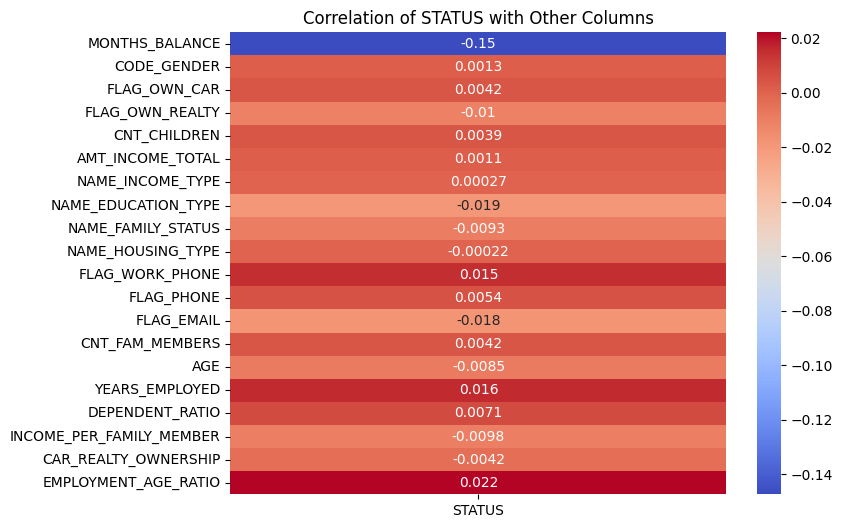

In [65]:
df_merged.drop(columns=['ID'], inplace=True)
df_merged['STATUS'] = label_encoder.fit_transform(df_merged['STATUS'])

target_column = 'STATUS'
correlations = df_merged.corr()[[target_column]].drop(target_column)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', cbar=True)
plt.title(f"Correlation of {target_column} with Other Columns")
plt.show()

STATUS
6    17950
7     9669
0     8456
1      276
5       76
2       19
3        6
4        5
Name: count, dtype: int64


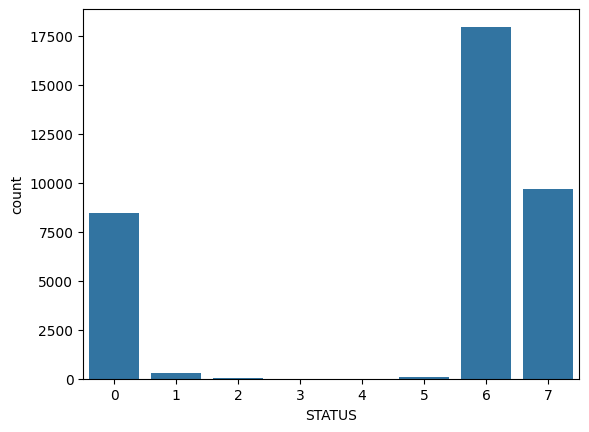

In [66]:
df_merged.drop(columns=['NAME_HOUSING_TYPE'], inplace=True)
df_merged.drop(columns=['NAME_INCOME_TYPE'], inplace=True)

class_distribution = df_merged['STATUS'].value_counts()
print(class_distribution)

sns.countplot(x='STATUS', data=df_merged)
plt.show()

In [67]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures

X = df_merged.drop('STATUS', axis=1)
y = df_merged['STATUS']

selector = VarianceThreshold(threshold=0.01)
X = selector.fit_transform(X)
X = pd.DataFrame(X, columns=df_merged.drop('STATUS', axis=1).columns[selector.get_support()])

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)

smote_enn = SMOTEENN(smote=smote, random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [68]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(X_resampled)

standardized_df = pd.DataFrame(standardized_data, columns=X_resampled.columns)

y_resampled_counts = pd.Series(y_resampled).value_counts()

In [ ]:
def split_data(df, label):
    X_train, X_temp, y_train, y_temp = train_test_split(df, label, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

def initilization_of_population(size, n_feat):
    population = []
    for _ in range(size):
        chromosome = np.ones(n_feat, dtype=bool)
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population, X_train, y_train, X_val, y_val, model):
    scores = []
    for chromosome in population:
        model.fit(X_train.iloc[:, chromosome], y_train)
        predictions = model.predict(X_val.iloc[:, chromosome])
        scores.append(accuracy_score(y_val, predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds, :][::-1])

def elite_selection(pop_after_fit, elite_size):
    return pop_after_fit[:elite_size]

def crossover(pop_after_sel):
    pop_nextgen = list(pop_after_sel)
    for i in range(0, len(pop_after_sel), 2):
        child_1, child_2 = pop_nextgen[i], pop_nextgen[(i + 1) % len(pop_after_sel)]
        crossover_point = len(child_1) // 2
        new_child = np.concatenate((child_1[:crossover_point], child_2[crossover_point:]))
        pop_nextgen.append(new_child)
    return pop_nextgen

def mutation(pop_after_cross, mutation_rate, n_feat, generation, max_generations):
    adaptive_rate = mutation_rate * (1 - (generation / max_generations))
    mutation_range = int(adaptive_rate * n_feat)
    pop_next_gen = []
    for chromo in pop_after_cross:
        chromo = chromo.copy()
        for _ in range(mutation_range):
            pos = np.random.randint(0, n_feat)
            chromo[pos] = not chromo[pos]
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df, label, size, n_feat, n_parents, mutation_rate, n_gen, model, elite_size=2):
    best_chromo = []
    best_score = []

    X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, label)
    population_nextgen = initilization_of_population(size, n_feat)

    for generation in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen, X_train, y_train, X_val, y_val, model)
        print(f"Generation {generation + 1}: Best Score: {scores[0]:.4f}")

        elites = elite_selection(pop_after_fit, elite_size)
        pop_after_sel = elite_selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat, generation, n_gen)

        population_nextgen.extend(elites)

        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])

    return best_chromo, best_score, X_train, y_train, X_test, y_test


In [ ]:
models_and_params = {
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    "DecisionTree": (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    "RandomForest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20]
    }),
    "MLP": (MLPClassifier(max_iter=100, random_state=42), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh']
    })
}

In [ ]:
def hyperparameter_tuning(model, params, X_train, y_train):
    grid = GridSearchCV(model, params, scoring='accuracy', cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Best Parameters:", grid.best_params_)
    return grid.best_estimator_

In [ ]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    return accuracy

final_data = standardized_df.copy()
final_data["STATUS"] = y_resampled.values

label = final_data["STATUS"]
final_data = final_data.drop(columns=["STATUS"], axis=1)
n_features = final_data.shape[1]

final_results = []
for model_name, (model, params) in models_and_params.items():
    print(f"\nRunning Genetic Algorithm with {model_name}...")
    best_chromosomes, best_scores, X_train, y_train, X_test, y_test = generations(final_data, label, size=50, n_feat=n_features, n_parents=20, mutation_rate=0.2, n_gen=5, model=model, elite_size=2)

    best_chromosome = best_chromosomes[-1]
    selected_features = final_data.columns[best_chromosome]

    print(f"\nHyper-parameter tuning for {model_name}...")
    tuned_model = hyperparameter_tuning(model, params, X_train.iloc[:, best_chromosome], y_train)

    print(f"\nEvaluating {model_name}...")
    accuracy = evaluate_model(tuned_model, X_test.iloc[:, best_chromosome], y_test)
    final_results.append((model_name, accuracy))

final_results.sort(key=lambda x: x[1], reverse=True)
print("\nFinal Accuracy Results:")
for model_name, accuracy in final_results:
    print(f"{model_name}: {accuracy:.4f}")

best_model_name, best_model_accuracy = final_results[0]
print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


Running Genetic Algorithm with KNN...
Generation 1: Best Score: 0.9559
Generation 2: Best Score: 0.9559
Generation 3: Best Score: 0.9559
Generation 4: Best Score: 0.9561
Generation 5: Best Score: 0.9561

Hyper-parameter tuning for KNN...
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}

Evaluating KNN...
Accuracy: 0.9852468690577667
Confusion Matrix:
[[ 808   15    1    0    0    3   20   33]
 [   3 2077    0    0    0    1    3    1]
 [   0    0 2586    0    0    0    0    2]
 [   0    0    0 2773    0    0    0    0]
 [   0    0    0    0 2607    0    0    0]
 [   0    0    0    0    0 2405    0    0]
 [  20    8    0    2    0    1  692   44]
 [  28   13    0    0    0    3   24 1078]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       880
           1       0.98      1.00      0.99      2085
           2       1.00      1.00      1.00      2588
           3       1.00      1.00      1.00      27